# Stock Price Prediction


# Library Import

In [14]:
import pandas as pd
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf

# Data Read


In [18]:
stock = yf.Ticker("TSLA")

df = pd.DataFrame(stock.history(period="900d", interval="1d"))

In [19]:
df.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2019-10-30 00:00:00-04:00,20.866667,21.252666,20.664667,21.000668,144627000,0.0,0.0
2019-10-31 00:00:00-04:00,20.873333,21.266666,20.866667,20.994667,76005000,0.0,0.0
2019-11-01 00:00:00-04:00,21.087999,21.098667,20.653334,20.887333,95758500,0.0,0.0
2019-11-04 00:00:00-05:00,20.986668,21.462667,20.617332,21.164667,131805000,0.0,0.0
2019-11-05 00:00:00-05:00,21.308001,21.567333,21.074667,21.148001,104151000,0.0,0.0


# Data Visualization

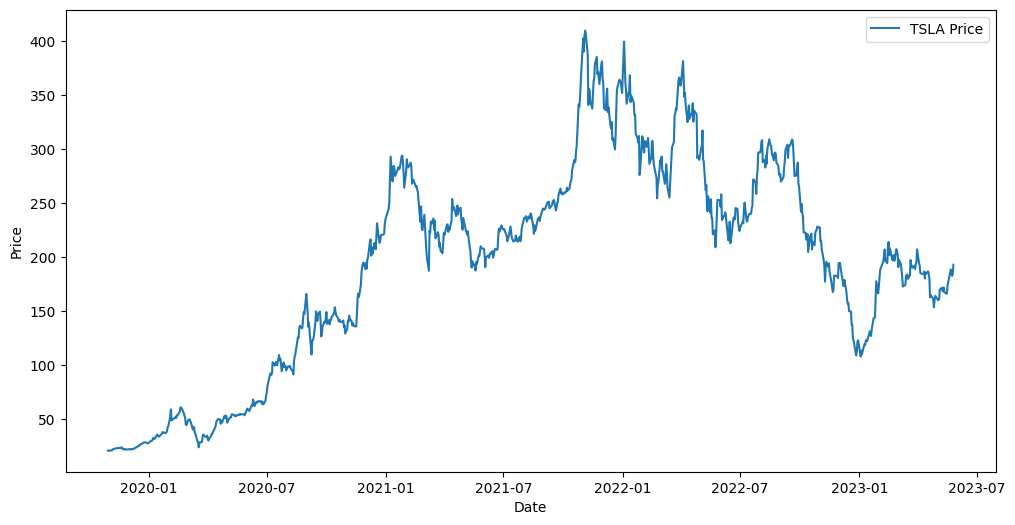

In [20]:
df = df.drop(["Dividends", "Stock Splits"], axis=1)

plt.figure(figsize=(12,6))

plt.plot(df["Close"], label='TSLA Price')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

# Create Model

In [22]:
x = df[['Open', 'High', 'Low', 'Volume']].copy()
y = df[["Close"]].copy()

scaler = MinMaxScaler()

x[['Open', 'High', 'Low', 'Volume']] = scaler.fit_transform(x[['Open', 'High', 'Low', 'Volume']])

x = np.array(x)
x= np.reshape(x, (x.shape[0], x.shape[1], 1))

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [24]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(units=10,return_sequences=False,input_shape=(x_train.shape[1], 1))))
model.add(tf.keras.layers.Dense(units=20))
model.add(tf.keras.layers.Dense(units=1))

opt = tf.keras.optimizers.Adam()
model.compile(optimizer=opt, loss='mean_squared_error', metrics=["mean_absolute_error"])

model.fit(x_train, y_train, epochs=80, verbose=1,batch_size=28)

26/26 [==============================] - 0s 6ms/step - loss: 58.1797 - mean_absolute_error: 5.0673
Epoch 71/80
26/26 [==============================] - 0s 6ms/step - loss: 57.2372 - mean_absolute_error: 5.0793
Epoch 72/80
26/26 [==============================] - 0s 6ms/step - loss: 56.5206 - mean_absolute_error: 5.0654
Epoch 73/80
26/26 [==============================] - 0s 6ms/step - loss: 54.1586 - mean_absolute_error: 4.9173
Epoch 74/80
26/26 [==============================] - 0s 6ms/step - loss: 52.6643 - mean_absolute_error: 4.8553
Epoch 75/80
26/26 [==============================] - 0s 6ms/step - loss: 52.4982 - mean_absolute_error: 4.9139
Epoch 76/80
26/26 [==============================] - 0s 6ms/step - loss: 51.7677 - mean_absolute_error: 4.8221
Epoch 77/80
26/26 [==============================] - 0s 6ms/step - loss: 51.2464 - mean_absolute_error: 4.8515
Epoch 78/80
26/26 [==============================] - 0s 6ms/step - loss: 49.0650 - mean_absolute_error: 4.7234
Epoch 79/80
2

# Create Predictions

In [29]:
predictions = model.predict(x)
predictions = pd.DataFrame(predictions)
predictions.columns = ["Close Predict"]
predictions.index = df.index


29/29 [==============================] - 0s 3ms/step


# Results

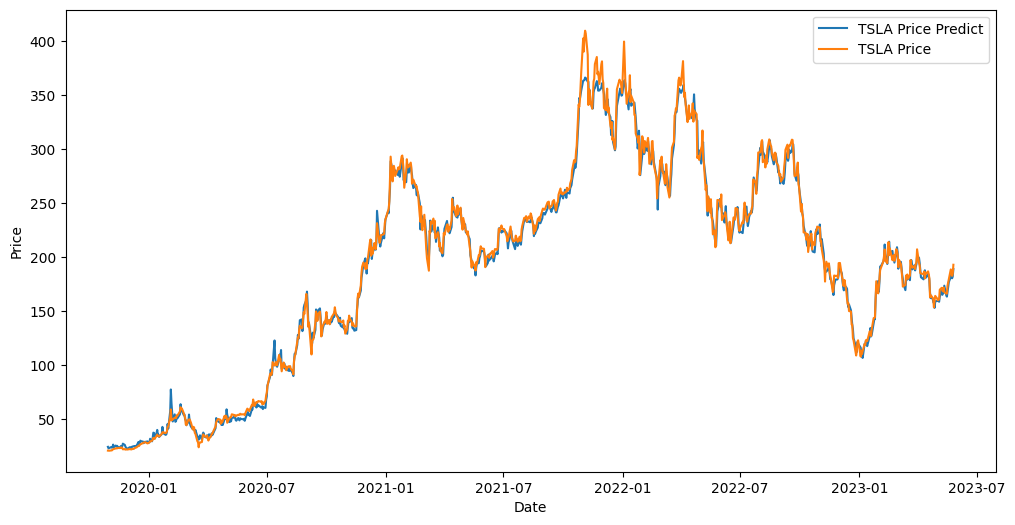

In [31]:
plt.figure(figsize=(12,6))
plt.plot(predictions["Close Predict"], label='TSLA Price Predict')
plt.plot(df["Close"], label='TSLA Price')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()